# IE 6400 Foundations for Data Analytics Engineering: Project 2
<b>Topic:</b> Customer Segmentation using RFM Analysis <br>
<b>Group 24 Members:</b> Ajay Rallapalli, Bharath Raj Pragada, Kartik Raut, Rahul Nenavath, Sai Rathnakar Reddy Paderla

### Importing Libraries

In [2]:
import warnings
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

warnings.filterwarnings('ignore')

### Data Import

In [3]:
online_retail_df = pd.read_csv("data.csv",encoding='ISO-8859-1')

In [4]:
online_retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [5]:
print(f'Number of rows: {online_retail_df.shape[0]}')
print(f'Number of columns: {online_retail_df.shape[1]}')

Number of rows: 541909
Number of columns: 8


In [6]:
online_retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


#### Column Descriptions:
`InvoiceNo`: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation. <br>
`StockCode`: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product. <br>
`Description`: Product (item) name. Nominal. <br>
`Quantity`: The quantities of each product (item) per transaction. Numeric. <br>
`InvoiceDate`: Invoice Date and time. Numeric, the day and time when each transaction was generated. <br>
`UnitPrice`: Unit price. Numeric, Product price per unit in sterling. <br>
`CustomerID`: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer. <br>
`Country`: Country name. Nominal, the name of the country where each customer resides. <br>

## Tasks:

### 1. Data Preprocessing:

#### Data Cleaning, Handling Missing Values, and Converting Data Types

#### Data Cleaning and Handling Missing Values

In [7]:
nan_values = online_retail_df.isna().sum()
nan_values

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Dropping all the rows where `CustomerID` is NaN

In [8]:
online_retail_df.dropna(subset=["CustomerID"],inplace=True)

In [9]:
nan_values = online_retail_df.isna().sum()
nan_values

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

#### Handling Duplicate Rows

In [10]:
duplicate_rows = online_retail_df.duplicated().sum()
print("Number of duplicate rows in the dataset:",duplicate_rows)

Number of duplicate rows in the dataset: 5225


Keeping the first occurence of duplicate and deleting the remaining duplicates.

In [11]:
online_retail_df = online_retail_df.drop_duplicates(keep="first")

Displaying the updated dataframe

In [12]:
online_retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [13]:
duplicate_rows = online_retail_df.duplicated().sum()
print("Number of duplicate rows in the dataset:",duplicate_rows)

Number of duplicate rows in the dataset: 0


In [14]:
print(f'Number of rows: {online_retail_df.shape[0]}')
print(f'Number of columns: {online_retail_df.shape[1]}')

Number of rows: 401604
Number of columns: 8


#### Converting Data Types

Converting `CustomerID` to string type as it acts a unique identifier and to prevent it from mathematical operations.

In [15]:
online_retail_df['CustomerID'] = online_retail_df['CustomerID'].astype(str)
online_retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


Here, we are extracting the year, month, day and weekday from the datetime attribute of the dataset `InvoiceDate`.

In [16]:
online_retail_df['InvoiceDate'] = pd.to_datetime(online_retail_df['InvoiceDate'])
online_retail_df['Invoice Date Only'] = online_retail_df['InvoiceDate'].dt.date
online_retail_df['Invoice Year'] = online_retail_df['InvoiceDate'].dt.year
online_retail_df['Invoice Month'] = online_retail_df['InvoiceDate'].dt.month
online_retail_df['Invoice Day'] = online_retail_df['InvoiceDate'].dt.day
online_retail_df["Week Day"] = online_retail_df['InvoiceDate'].dt.strftime("%A")

We are also extracting the hour from the `InvoiceDate` attribute to understand it better and perform further analysis.

In [17]:
online_retail_df['Order Hour'] = online_retail_df['InvoiceDate'].dt.hour

Exploring the unique `Quantity` values to identify any anomalies or outliers.

In [18]:
online_retail_df['Quantity'].describe()

count    401604.000000
mean         12.183273
std         250.283037
min      -80995.000000
25%           2.000000
50%           5.000000
75%          12.000000
max       80995.000000
Name: Quantity, dtype: float64

Upon closer observation of all the unique `Quantity` values, some values are found to be negative. This could be due to the fact that there are purchase returns or cancellations made by the customers.

In [19]:
cancelled_transactions = online_retail_df[online_retail_df['Quantity'] < 0]
cancelled_transactions.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice Date Only,Invoice Year,Invoice Month,Invoice Day,Week Day,Order Hour
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,2010-12-01,2010,12,1,Wednesday,9
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,2010-12-01,2010,12,1,Wednesday,9
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,2010-12-01,2010,12,1,Wednesday,10
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,2010-12-01,2010,12,1,Wednesday,10
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,2010-12-01,2010,12,1,Wednesday,10


In [20]:
unique_chars = set([i[0] for i in cancelled_transactions['InvoiceNo']])
print(f'Starting chars: {unique_chars}')

Starting chars: {'C'}


Further analysis of the purchase returns or cancelled transactions dataframe suggests that the invoice number for such transactions starts with the letter `C`.

In [21]:
print("Descriptive statistics of purchase returns or cancelled transactions:")
cancelled_transactions.describe().drop(["Invoice Year", "Invoice Month", "Invoice Day", "Order Hour"], axis=1)

Descriptive statistics of purchase returns or cancelled transactions:


,Quantity,UnitPrice
count,8872.000000,8872.000000
mean,-30.774910,18.899512
std,1172.249902,445.190864
min,-80995.000000,0.010000
25%,-6.000000,1.450000
50%,-2.000000,2.950000
75%,-1.000000,4.950000
max,-1.000000,38970.000000


Calculating the `Total_Amount` of each purchase made by the customer for further analysis.

In [22]:
online_retail_df['Total_Amount'] = online_retail_df['UnitPrice'] * online_retail_df['Quantity']

Displaying the updated dataframe used for analysis

In [23]:
online_retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice Date Only,Invoice Year,Invoice Month,Invoice Day,Week Day,Order Hour,Total_Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010,12,1,Wednesday,8,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010,12,1,Wednesday,8,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010,12,1,Wednesday,8,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010,12,1,Wednesday,8,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010,12,1,Wednesday,8,20.34


Descriptive statistics of the updated dataframe

In [24]:
online_retail_df.describe().drop(["Invoice Year", "Invoice Month", "Invoice Day", "Order Hour"], axis=1)

,Quantity,UnitPrice,Total_Amount
count,401604.000000,401604.000000,401604.000000
mean,12.183273,3.474064,20.613638
std,250.283037,69.764035,430.352218
min,-80995.000000,0.000000,-168469.600000
25%,2.000000,1.250000,4.250000
50%,5.000000,1.950000,11.700000
75%,12.000000,3.750000,19.800000
max,80995.000000,38970.000000,168469.600000


### 2. RFM Calculation:

In [25]:
purchases_excluding_returns = online_retail_df[online_retail_df['Quantity'] > 0]

#### Recency (R): How recently a customer made a purchase. Calculation of the number of days since the customer's last purchase

We are calculating the recency of a customer's purchase by adding one day to the latest date represented in the dataset. This approach allows us to determine how many days have passed since their most recent transaction. By doing so, we ensure that any customer whose latest transaction happened on that exact latest date will not end up with a recency of 0 days.

In [26]:
latest_date = (online_retail_df['Invoice Date Only'].max() + pd.DateOffset(days=1)).date()

print(latest_date)

2011-12-10


In [27]:
customer_recency = online_retail_df.groupby('CustomerID')['Invoice Date Only'].max().reset_index()
recency = (latest_date - customer_recency['Invoice Date Only']).dt.days
recency = pd.concat([customer_recency['CustomerID'], recency], axis=1)
recency.columns = ['CustomerID', 'Recency']
recency.head()

,CustomerID,Recency
0,12346.0,326
1,12347.0,3
2,12348.0,76
3,12349.0,19
4,12350.0,311


#### Frequency (F): How often a customer makes a purchase. Calculation of the total number of orders for each customer.

We are only considering purchases and excluding return or cancellations for calculation of frequency because calculating frequency based on all transactions (including returns or cancellations) might overestimate a customer's engagement, as returns or cancellations do not necessarily reflect additional purchases or higher engagement.

In [28]:
frequency = purchases_excluding_returns.groupby('CustomerID')['InvoiceNo'].nunique().reset_index(name='Frequency')
frequency.head()

,CustomerID,Frequency
0,12346.0,1
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1


#### Monetary (M): The total monetary value of a customer's purchases. Calculation of the sum of the total price for each customer.

We are calculating the monetary by considering purchases excluding returns as it allows us to focus solely on the positive economic impact generated by customers through their purchases. By excluding returns we are looking specifically at the amount customers have spent, providing a more accurate representation of their contribution to the business's revenue.

In [29]:
monetary = purchases_excluding_returns.groupby('CustomerID')['Total_Amount'].sum().reset_index(name='Monetary')
monetary.head()

,CustomerID,Monetary
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [30]:
RFM_table = pd.merge(recency, frequency, on='CustomerID').merge(monetary, on='CustomerID')
RFM_table.sort_values(by="CustomerID",ascending=True)

,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,1,77183.60
1,12347.0,3,7,4310.00
2,12348.0,76,4,1797.24
3,12349.0,19,1,1757.55
4,12350.0,311,1,334.40
...,...,...,...,...
4334,18280.0,278,1,180.60
4335,18281.0,181,1,80.82
4336,18282.0,8,2,178.05
4337,18283.0,4,16,2045.53


### 3. RFM Segmentation:

#### Assigning RFM scores to each customer based on their quartiles

In [31]:
RFM_table["Recency Score"] = pd.qcut(RFM_table['Recency'], q=4, labels=[4, 3, 2, 1])
RFM_table["Frequency Score"] = pd.qcut(RFM_table['Frequency'].rank(method="first"), q=4, labels=[1, 2, 3, 4])
RFM_table["Monetary Score"] = pd.qcut(RFM_table['Monetary'], q=4, labels=[1, 2, 3, 4])

This analysis focuses solely on combining `Recency` and `Frequency` while disregarding the `Monetary` value, i.e., the amount spent by customers due to the following reasons mentioned below:<br>
<br>
<b>Simplification of Behavioral Insights:</b> By concentrating on `Recency` and `Frequency`, the analysis simplifies customer segmentation, making it easier to derive insights into behavioral patterns without considering the actual spending amount.<br>
<br>
<b>Behavioral Emphasis:</b> This approach highlights customer behavior—how recently they have engaged and how frequently they do so. For eCommerce platforms, this is essential when targeting customers based on their activity levels and engagement rather than the total amount they have spent.<br>
<br>
<b>Targeting Engagement and Loyalty:</b> Customer engagement and loyalty outweigh immediate monetary gains. The aim is to increase user interaction and understanding how often customers engage and how recently they have interacted.

In [32]:
RFM_table['RFM_Score'] = RFM_table['Recency Score'].astype(str) + RFM_table['Frequency Score'].astype(str)

In [33]:
RFM_table.head()

,CustomerID,Recency,Frequency,Monetary,Recency Score,Frequency Score,Monetary Score,RFM_Score
0,12346.0,326,1,77183.60,1,1,4,11
1,12347.0,3,7,4310.00,4,4,4,44
2,12348.0,76,4,1797.24,2,3,4,23
3,12349.0,19,1,1757.55,3,1,4,31
4,12350.0,311,1,334.40,1,1,2,11


In [34]:
segment_mapping = {
    r'[1-2][1-2]': "Hibernating",
    r'[1-2]3': "At Risk",
    r'[1-2]4': "Can't Loose",
    r'3[1-2]': "About to Sleep",
    r'33': "Need Attention",
    r'3[4]': "Loyal Customers",
    r'41': "Promising",
    r'4[2-3]': "Potential Loyalists",
    r'44': "Champions"
}

RFM_table['RFM_Segment'] = RFM_table['RFM_Score'].replace(segment_mapping, regex=True)
RFM_table.head()

,CustomerID,Recency,Frequency,Monetary,Recency Score,Frequency Score,Monetary Score,RFM_Score,RFM_Segment
0,12346.0,326,1,77183.60,1,1,4,11,Hibernating
1,12347.0,3,7,4310.00,4,4,4,44,Champions
2,12348.0,76,4,1797.24,2,3,4,23,At Risk
3,12349.0,19,1,1757.55,3,1,4,31,About to Sleep
4,12350.0,311,1,334.40,1,1,2,11,Hibernating


In [35]:
RFM_Statistics = RFM_table[["RFM_Segment", "Recency", "Frequency", "Monetary"]].groupby("RFM_Segment").agg(["mean", "count", "max"])
RFM_Statistics

Recency             Frequency                Monetary  \
                           mean count  max       mean count  max         mean   
RFM_Segment                                                                     
About to Sleep        31.688940   434   50   1.400922   434    2   488.447788   
At Risk              124.480167   479  367   3.141962   479    5  1247.077580   
Can't Loose           98.789773   176  313   6.971591   176   34  2502.481307   
Champions              7.278716   592   17  13.836149   592  210  7602.626419   
Hibernating          183.281167  1508  374   1.248011  1508    2   501.404782   
Loyal Customers       29.287066   317   50   8.618297   317   63  4096.821924   
Need Attention        30.633333   330   50   3.309091   330    5  1225.074730   
Potential Loyalists    8.619490   431   17   2.846868   431    5  1511.711717   
Promising              8.722222    72   17   1.000000    72    1   361.770417   

                                      
                    count        max  
RFM_Segment                           
About to Sleep        434    6207.67  
At Risk               479   44534.30  
Can't Loose           176   21279.29  
Champions             592  280206.02  
Hibernating          1508   77183.60  
Loyal Customers       317  124914.53  
Need Attention        330    6748.80  
Potential Loyalists   431  168472.50  
Promising              72    3861.00

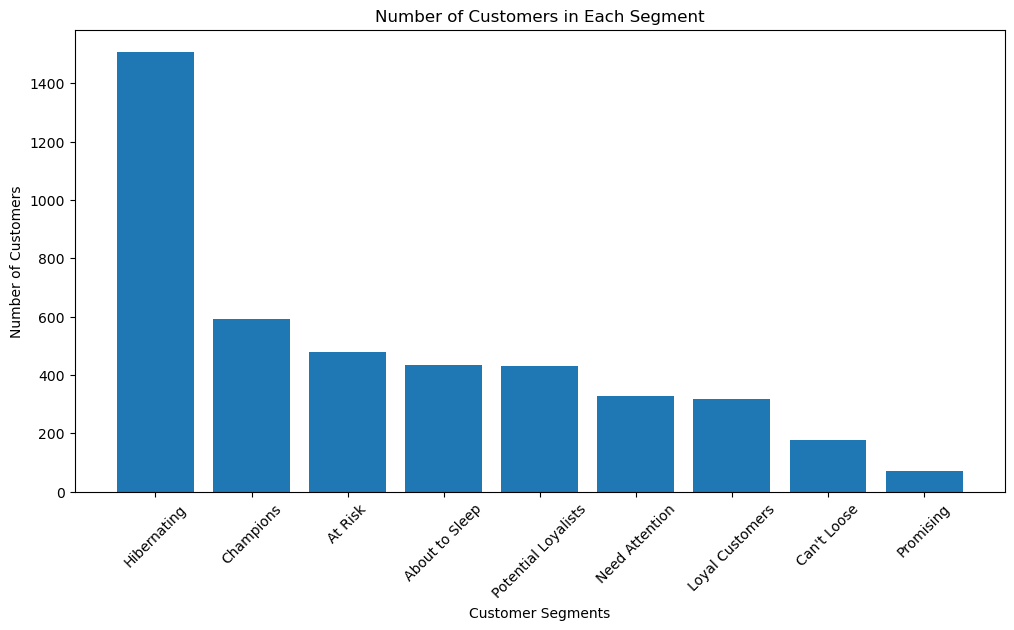

In [36]:
RFM_segment_grouping = RFM_table["RFM_Segment"].value_counts()

plt.figure(figsize=(12, 6))
plt.bar(RFM_segment_grouping.index, RFM_segment_grouping.values)
plt.xticks(rotation=45)
plt.xlabel("Customer Segments")
plt.ylabel("Number of Customers")
plt.title("Number of Customers in Each Segment")
plt.show()

### 4. Customer Segmentation:

#### Clustering techniques (e.g., K-Means clustering) to segment customers based on their RFM scores

In [37]:
RFM_scores = RFM_table[['Recency', 'Frequency', 'Monetary']]

In [38]:
scaler = StandardScaler()

RFM_scaled = scaler.fit_transform(RFM_scores)

RFM_scaled_df = pd.DataFrame(RFM_scaled, columns=['Scaled_Recency', 'Scaled_Frequency', 'Scaled_Monetary'])

RFM_scaled_df.head()

,Scaled_Recency,Scaled_Frequency,Scaled_Monetary
0,2.367699,-0.424675,8.363977
1,-0.887745,0.354080,0.251779
2,-0.151995,-0.035297,-0.027938
3,-0.726485,-0.424675,-0.032357
4,2.216517,-0.424675,-0.190780


In [39]:
clusters_range = range(2, 11)  

inertia_values = []

for n_clusters in clusters_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(RFM_scaled_df)
    inertia_values.append(kmeans.inertia_)
    
print(f"Inertia Values of K-Means Clustering: {inertia_values}")

Inertia Values of K-Means Clustering: [9016.60301289239, 5448.223466961865, 4100.565567825251, 3124.9788482221443, 2476.4469455992726, 2021.082122343484, 1713.5290550023308, 1461.3161673908671, 1279.0865879212818]


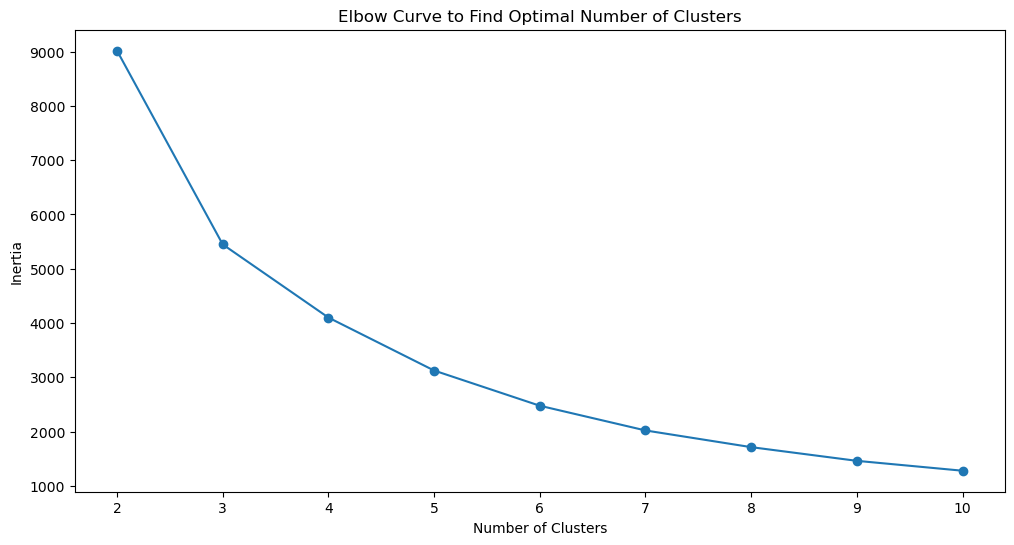

In [40]:
plt.figure(figsize=(12, 6))
plt.plot(clusters_range, inertia_values, marker='o', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Curve to Find Optimal Number of Clusters')
plt.show()

<b>Inference:</b> The elbow method looks for an "elbow point" in a plot of the number of clusters against the within-cluster sum of squares (inertia). The point where the inertia starts to decrease at a slower rate (forming an elbow-like curve) is often considered as a potential optimal number of clusters. In this case, the elbow point on the inertia plot corresponds to `3` clusters, it suggests that adding more clusters beyond that point might not significantly reduce the inertia or improve the clustering quality.

In [41]:
silhouette_scores = []
for n_clusters in clusters_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(RFM_scaled_df)
    score = silhouette_score(RFM_scaled_df, kmeans.labels_)
    silhouette_scores.append(score)
    
print(f"Silhouette Scores of K-Means Clustering: {silhouette_scores}")

Silhouette Scores of K-Means Clustering: [0.8959509335625487, 0.5943247206572742, 0.616104929122839, 0.6165319588444279, 0.5982839069480245, 0.520792417673972, 0.47770876035797805, 0.478103352783303, 0.479613418322844]


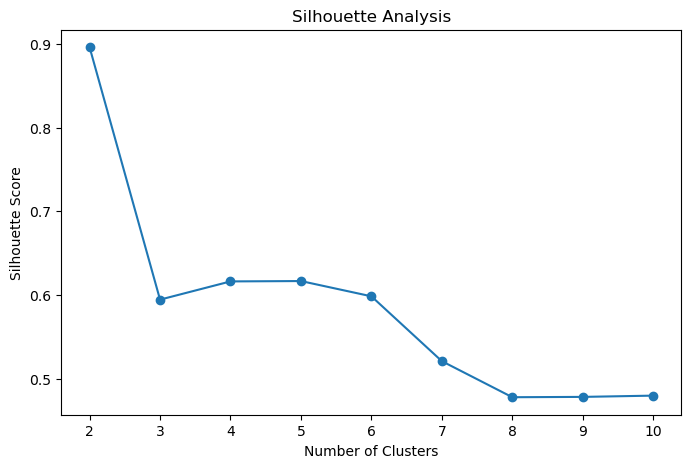

In [42]:
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker="o", linestyle="-")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Analysis")
plt.show()

<b>Inference:</b> The silhouette analysis measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouette score ranges from -1 to 1, where higher values indicate better-defined clusters.
A higher average silhouette score suggests better-defined clusters. In this scenario, having an optimal number of `4` clusters implies that the average silhouette score is maximized with four clusters. This score suggests that the clusters formed are distinct and well-separated.

Therefore, the elbow curve and the silhouette analysis methods suggest that the optimal number of clusters is can be `3` (or) `4` 

#### Experiment with different numbers of clusters to find the optimal number that provides meaningful segments

#### Choosing the number of clusters as 3

In [43]:
clusters = 3

kmeans = KMeans(n_clusters=clusters, random_state=0)

RFM_table["Cluster"] = kmeans.fit_predict(RFM_scaled_df)

RFM_table = pd.concat([RFM_table, RFM_scaled_df], axis=1)

RFM_table.head()

,CustomerID,Recency,Frequency,Monetary,Recency Score,Frequency Score,Monetary Score,RFM_Score,RFM_Segment,Cluster,Scaled_Recency,Scaled_Frequency,Scaled_Monetary
0,12346.0,326,1,77183.60,1,1,4,11,Hibernating,1,2.367699,-0.424675,8.363977
1,12347.0,3,7,4310.00,4,4,4,44,Champions,2,-0.887745,0.354080,0.251779
2,12348.0,76,4,1797.24,2,3,4,23,At Risk,2,-0.151995,-0.035297,-0.027938
3,12349.0,19,1,1757.55,3,1,4,31,About to Sleep,2,-0.726485,-0.424675,-0.032357
4,12350.0,311,1,334.40,1,1,2,11,Hibernating,1,2.216517,-0.424675,-0.190780


In [44]:
colors = ["red", "blue", "green"]
cluster_labels = ["Cluster 1", "Cluster 2", "Cluster 3"]

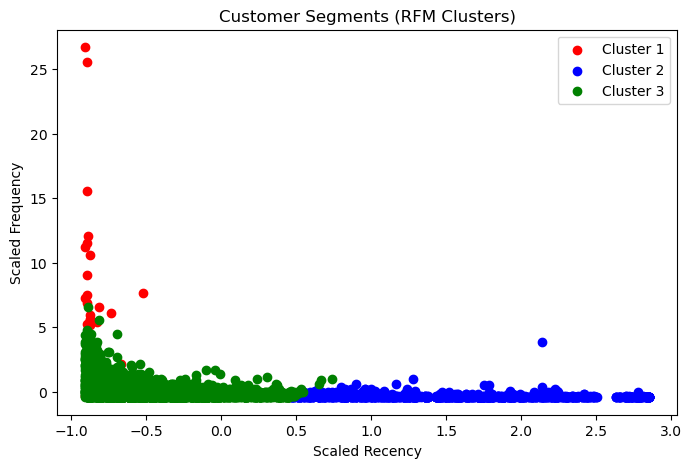

In [45]:
plt.figure(figsize=(8, 5))
for cluster in range(clusters):
    plt.scatter(RFM_table[RFM_table["Cluster"] == cluster]["Scaled_Recency"],
                RFM_table[RFM_table["Cluster"] == cluster]["Scaled_Frequency"], 
                label=cluster_labels[cluster], color=colors[cluster])
plt.title("Customer Segments (RFM Clusters)")
plt.xlabel("Scaled Recency")
plt.ylabel("Scaled Frequency")
plt.legend()
plt.show()

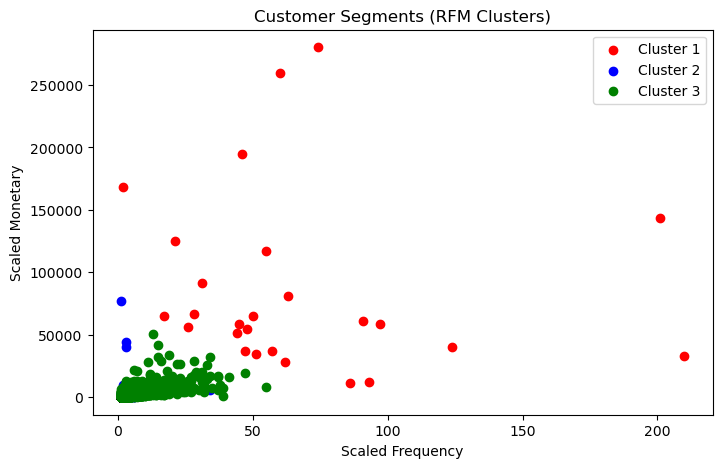

In [46]:
plt.figure(figsize=(8, 5))
for cluster in range(clusters):
    plt.scatter(RFM_table[RFM_table["Cluster"] == cluster]["Frequency"],
                RFM_table[RFM_table["Cluster"] == cluster]["Monetary"], 
                label=cluster_labels[cluster], color=colors[cluster])
plt.title("Customer Segments (RFM Clusters)")
plt.xlabel("Scaled Frequency")
plt.ylabel("Scaled Monetary")
plt.legend()
plt.show()

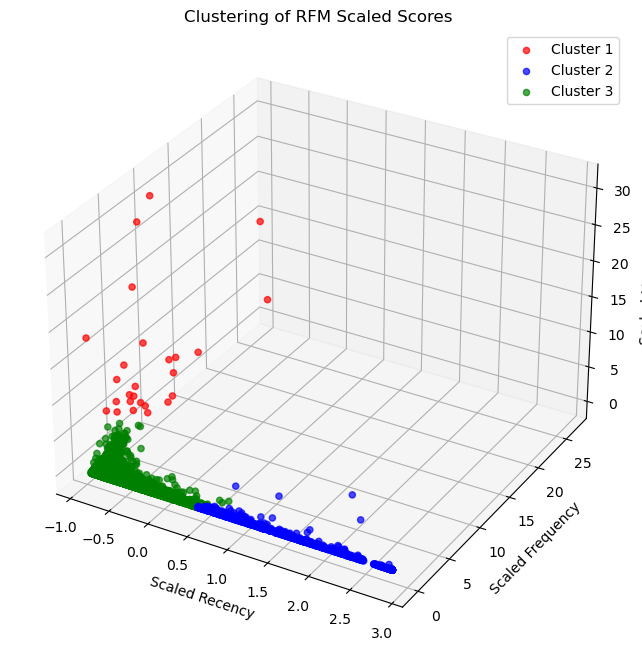

In [47]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for cluster_id, color, label in zip(range(0, 3), colors, cluster_labels):
    cluster_data = RFM_table[RFM_table['Cluster'] == cluster_id]
    ax.scatter(
        cluster_data['Scaled_Recency'],
        cluster_data['Scaled_Frequency'],
        cluster_data['Scaled_Monetary'],
        label=label,
        color=color,
        alpha=0.7
    )

ax.set_xlabel('Scaled Recency')
ax.set_ylabel('Scaled Frequency')
ax.set_zlabel('Scaled Monetary')
ax.set_title('Clustering of RFM Scaled Scores')

ax.legend()

plt.show()

#### Choosing the number of clusters as 4

In [48]:
clusters = 4

kmeans = KMeans(n_clusters=clusters, random_state=0)

RFM_table["Cluster"] = kmeans.fit_predict(RFM_scaled_df)

RFM_table = pd.concat([RFM_table, RFM_scaled_df], axis=1)

RFM_table.head()

,CustomerID,Recency,Frequency,Monetary,Recency Score,Frequency Score,Monetary Score,RFM_Score,RFM_Segment,Cluster,Scaled_Recency,Scaled_Frequency,Scaled_Monetary,Scaled_Recency,Scaled_Frequency,Scaled_Monetary
0,12346.0,326,1,77183.60,1,1,4,11,Hibernating,3,2.367699,-0.424675,8.363977,2.367699,-0.424675,8.363977
1,12347.0,3,7,4310.00,4,4,4,44,Champions,1,-0.887745,0.354080,0.251779,-0.887745,0.354080,0.251779
2,12348.0,76,4,1797.24,2,3,4,23,At Risk,1,-0.151995,-0.035297,-0.027938,-0.151995,-0.035297,-0.027938
3,12349.0,19,1,1757.55,3,1,4,31,About to Sleep,1,-0.726485,-0.424675,-0.032357,-0.726485,-0.424675,-0.032357
4,12350.0,311,1,334.40,1,1,2,11,Hibernating,0,2.216517,-0.424675,-0.190780,2.216517,-0.424675,-0.190780


In [49]:
colors = ["red", "blue", "green","yellow"]
cluster_labels = ["Cluster 1", "Cluster 2", "Cluster 3", "Cluster 4"]

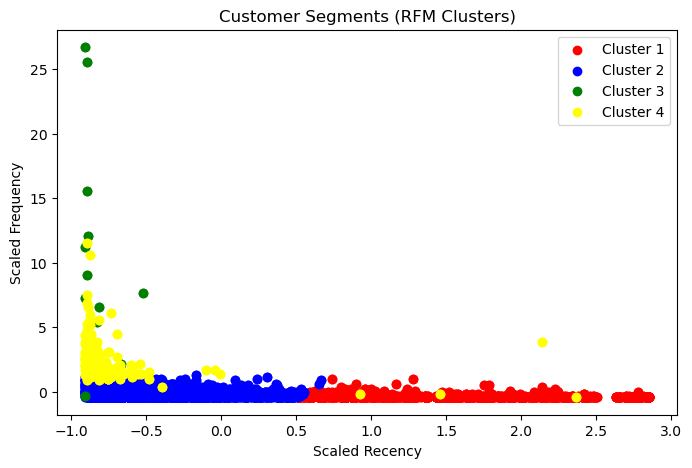

In [98]:
plt.figure(figsize=(8, 5))
for cluster in range(clusters):
    plt.scatter(RFM_table[RFM_table["Cluster"] == cluster]["Scaled_Recency"],
                RFM_table[RFM_table["Cluster"] == cluster]["Scaled_Frequency"], 
                label=cluster_labels[cluster], color=colors[cluster])
plt.title("Customer Segments (RFM Clusters)")
plt.xlabel("Scaled Recency")
plt.ylabel("Scaled Frequency")
plt.legend()
plt.show()

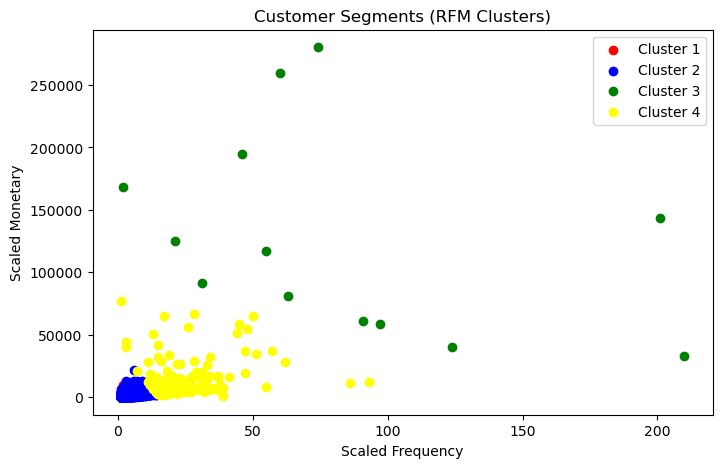

In [99]:
plt.figure(figsize=(8, 5))
for cluster in range(clusters):
    plt.scatter(RFM_table[RFM_table["Cluster"] == cluster]["Frequency"],
                RFM_table[RFM_table["Cluster"] == cluster]["Monetary"], 
                label=cluster_labels[cluster], color=colors[cluster])
plt.title("Customer Segments (RFM Clusters)")
plt.xlabel("Scaled Frequency")
plt.ylabel("Scaled Monetary")
plt.legend()
plt.show()

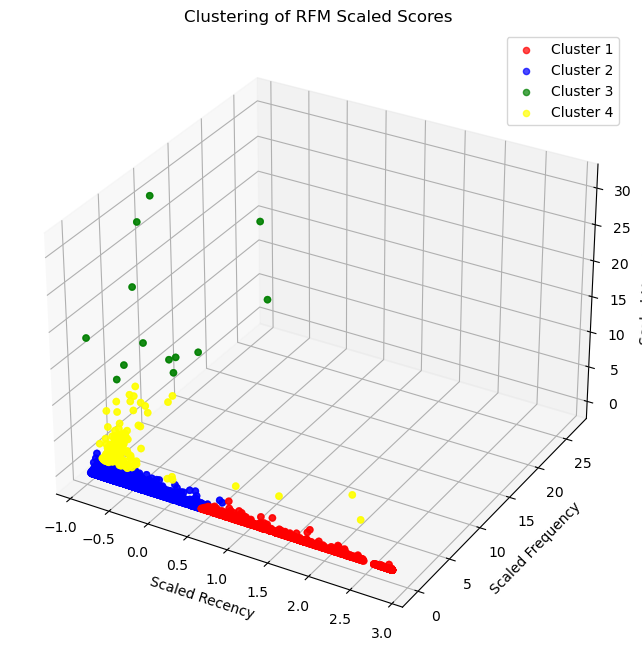

In [102]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for cluster_id, color, label in zip(range(0, 4), colors, cluster_labels):
    cluster_data = RFM_table[RFM_table['Cluster'] == cluster_id]
    ax.scatter(
        cluster_data['Scaled_Recency'],
        cluster_data['Scaled_Frequency'],
        cluster_data['Scaled_Monetary'],
        label=label,
        color=color,
        alpha=0.7
    )

ax.set_xlabel('Scaled Recency')
ax.set_ylabel('Scaled Frequency')
ax.set_zlabel('Scaled Monetary')
ax.set_title('Clustering of RFM Scaled Scores')

ax.legend()

plt.show()

<b>Inference:</b><br>According to the elbow method analysis, it was observed that the optimal number of clusters is 3, therefore, it is inferred that the optimal number of clusters for customer segmentation, based on this analysis, is 3. Given this insight, the business could focus on strategies tailored for three distinct customer segments, which may lead to more effective marketing and service approaches. Silhouette analysis, which considers both the cohesion and separation of clusters, indicated that the optimal number of clusters for customer segmentation is 4. This is supported by a higher average silhouette score for 4 clusters compared to other.

### 5. Segment Profiling:

We have 9 customer segments, based on permutations of `1` to `4` levels of Recency & Frequency.
- The customers who are `Hibernating` are the ones who are not active as they have very low recency and low frequency scores. These are the ones who might have made a purchase on festive deals and never returned again.
- The customers who have low recency but had a medium frequency are labelled as `At Risk` as the company might lose them to other e-commerce platforms if they are not prompted to make a new purchase.
- The customers who did not recently ordered but had frequently ordered in the past, are the ones the company `Can't loose` as these customers clearly ordered a lot in the past but have purchased nothing in the past few months.
- The segment of customers who have recently made a purchase but placed very few orders are the ones who are `About to Sleep` customers. Usually these customers move from this segment to hibernating if they don't make any new purchase in the near future.
- The customers who have made a purchase in a near past with good frequency are the ones who `Need Attention`. These are the customers are showing potential to buy more in the near future.
- The customers who buy frequently and be consistent at it are the company's `Loyal Customers`. These customers keep coming back to place an order at regular intervals to time.
- The customers who have made a recent purchase but do not often make a purchase are the ones under the `Promising` segment.
- The customers who make made a recent purchase but have made a few purchases here and there are the ones who can be `Potential Loyalists` to the company.
- Finally, the customers who have made recent purchases and also made it often are your `Champions`. They truly believe in company's good & services and would love to continue supporting the company.

These segmentation helps the marketing team to map the customers from different segments to different marketing campaigns. We don't have more user-demographic data to do further analysis on interesting characteristics of each segment.

Computing the average spending of each customer segment

In [50]:
average_spending = RFM_table.groupby('RFM_Segment')['Monetary'].mean().reset_index()
average_spending

,RFM_Segment,Monetary
0,About to Sleep,488.447788
1,At Risk,1247.077580
2,Can't Loose,2502.481307
3,Champions,7602.626419
4,Hibernating,501.404782
5,Loyal Customers,4096.821924
6,Need Attention,1225.074730
7,Potential Loyalists,1511.711717
8,Promising,361.770417


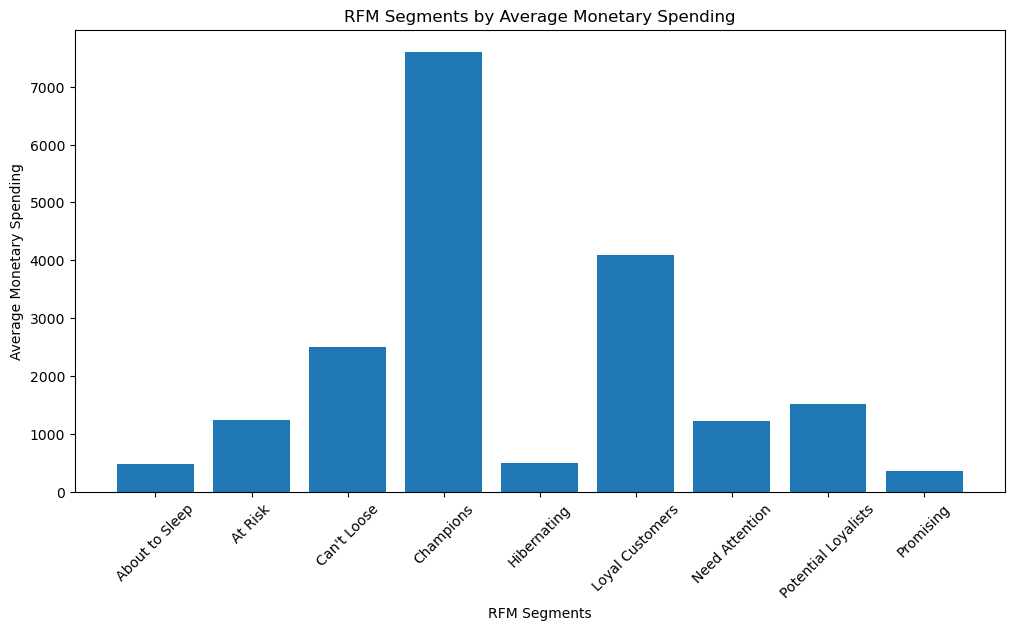

In [51]:
plt.figure(figsize=(12, 6))
plt.bar(average_spending["RFM_Segment"], average_spending["Monetary"])
plt.xticks(rotation=45)
plt.title("RFM Segments by Average Monetary Spending")
plt.xlabel("RFM Segments")
plt.ylabel("Average Monetary Spending")
plt.show()

Looking at the average customer spending across segments provides insights into the varying purchasing behaviors of different customer groups.<br>
<br>
<b>Champions:</b> These customers are highly engaged and loyal, making frequent purchases with a significantly higher average monetary value of `7,602`. They represent a high-value segment and might respond well to exclusive loyalty programs or VIP offers that recognize their loyalty.<br>
<br>
<b>Loyal Customers:</b> Similarly engaged but with a slightly lower average spending of `4,096`, this segment still represents consistent and valuable customers. Continual engagement campaigns or tiered rewards can further encourage their loyalty.<br>
<br>
<b>Can't Loose:</b> Though not recently active, these customers have historically spent a substantial amount of `2,502` on average. It's crucial to devise win-back campaigns or personalized offers to reignite their interest and bring them back to making purchases.<br>
<br>
<b>At Risk:</b> With an average spending of `1,247`, these customers have shown moderate engagement but are at the risk of churning. Targeted re-engagement strategies, perhaps with limited-time offers or reminders of exclusive benefits, could help retain them.<br>
<br>
<b>Potential Loyalists:</b> Despite their recent purchase, this segment's average spending of `1,511` indicates potential for higher engagement. Tailored promotions or product recommendations based on their recent purchases might encourage them to become more loyal customers.<br>
<br>
<b>Need Attention:</b> Although these customers have made recent purchases, their average spending is `1,225`. Targeted follow-ups with personalized recommendations or incentives can encourage them to increase their purchase frequency or spend more.<br>
<br>
<b>Promising:</b> Customers in this segment have made recent purchases but have a lower average spending of `361`. Introducing them to new products or offering incentives could prompt them to become more frequent buyers and buy more.<br>
<br>
<b>About to Sleep:</b> While these customers have low recent activity, their average spending is `488`. Engaging them with reactivation campaigns, highlighting new offerings, or offering incentives might prevent them from moving into the Hibernating segment.<br>
<br>
<b>Hibernating:</b> Customers here have both low recency and low spending, with an average of `501`. They might respond to strong reactivation campaigns, such as special discounts or tailored offers, to re-engage them with the platform.<br>
<br>
### 6. Marketing Recommendations:
<br>
<b>Targeted Campaigns:</b> Tailor campaigns specific to each segment's behavior and potential as mentioned above. Use data-driven insights to personalize offers and messages.<br>
<br>
<b>Reactivation Strategies:</b> Focus on re-engaging dormant customers segments such as About to Sleep and Hibernating by highlighting new features, exclusive offers, or time-limited discounts.<br>
<br>
<b>Loyalty Programs:</b> Reinforce loyalty among Champions and Loyal Customers with exclusive rewards or VIP treatments to maintain their engagement.<br>
<br>
<b>Upselling/Cross-selling:</b> Use the potential of Potential Loyalists and Promising segments by recommending complementary products or upselling based on their previous purchases to increase revenue.<br>
<br>
<b>Segment-Specific Offers:</b> Create segment-specific promotions or bundles that align with the behavior and potential of each group to encourage increased spending or frequency.<br>
<br>
Continuously monitor and adjust these strategies based on customer response to maximize their effectiveness.

### 7. Visualizations:

Box plots to observe the distribution of `Recency`, `Frequency` and `Monetary` metrics and determine outliers in each customer segment.

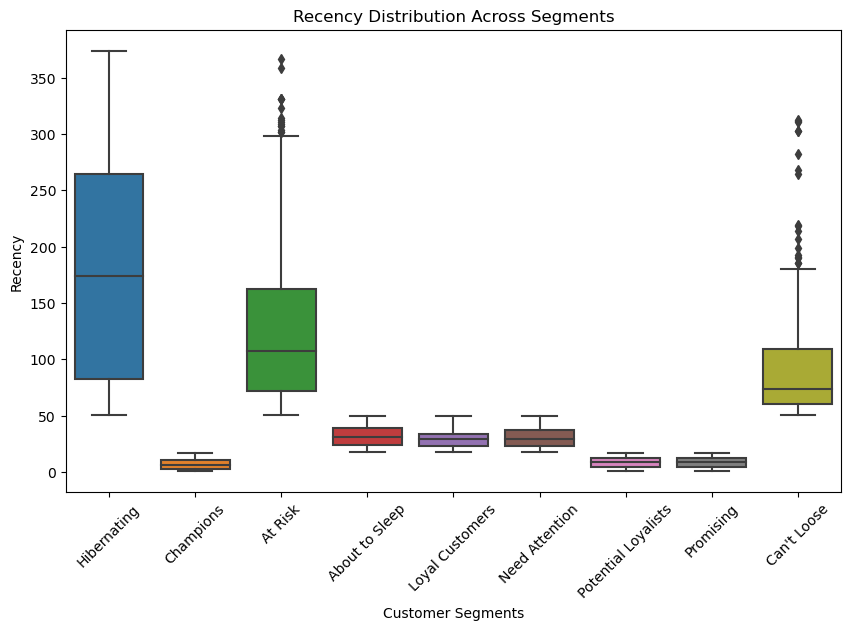

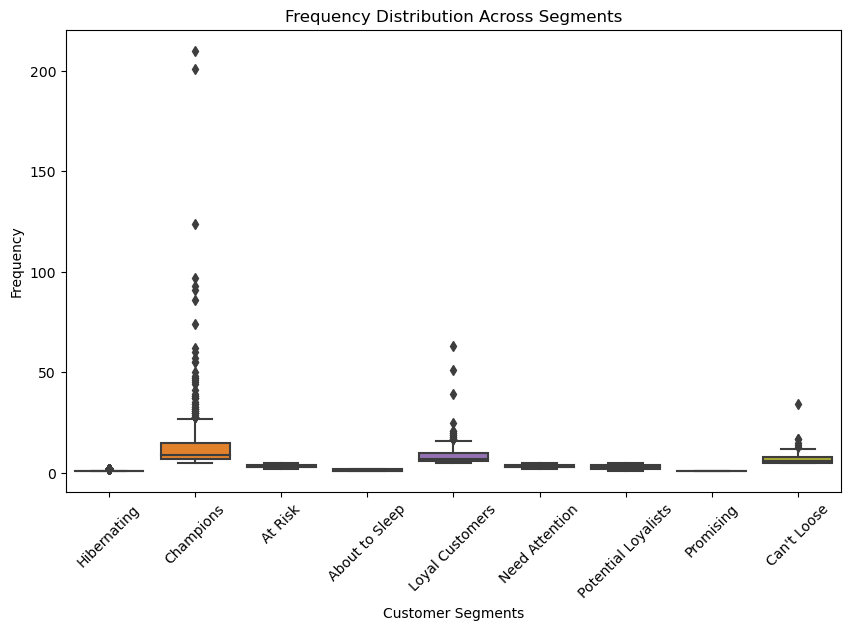

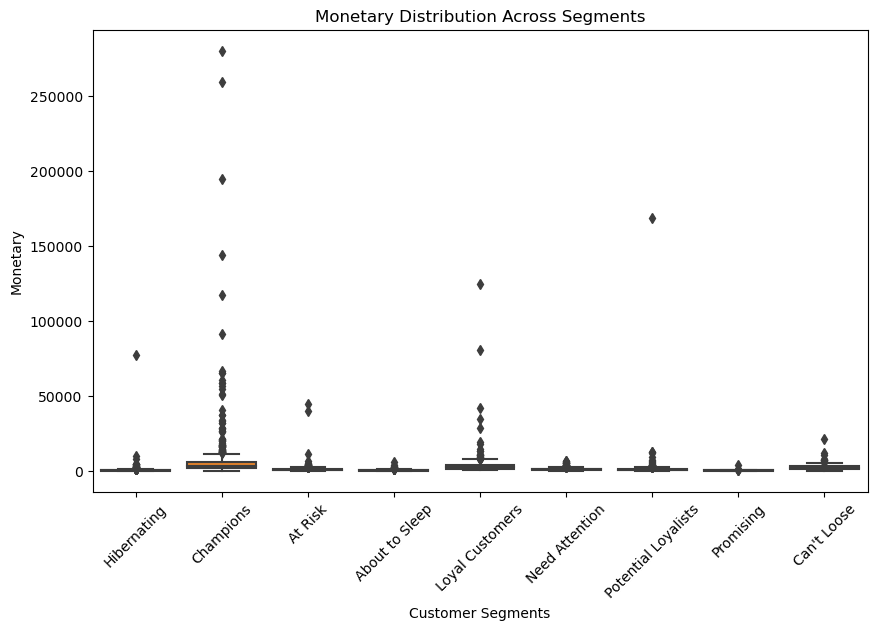

In [52]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='RFM_Segment', y='Recency', data=RFM_table)
plt.title('Recency Distribution Across Segments')
plt.xlabel('Customer Segments')
plt.ylabel('Recency')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='RFM_Segment', y='Frequency', data=RFM_table)
plt.title('Frequency Distribution Across Segments')
plt.xlabel('Customer Segments')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='RFM_Segment', y='Monetary', data=RFM_table)
plt.title('Monetary Distribution Across Segments')
plt.xlabel('Customer Segments')
plt.ylabel('Monetary')
plt.xticks(rotation=45)
plt.show()

## Solutions to the Given Questions:

### 1. Data Overview

In [53]:
online_retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice Date Only,Invoice Year,Invoice Month,Invoice Day,Week Day,Order Hour,Total_Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010,12,1,Wednesday,8,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010,12,1,Wednesday,8,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010,12,1,Wednesday,8,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010,12,1,Wednesday,8,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010,12,1,Wednesday,8,20.34


<b>Column Descriptions:</b><br>
`InvoiceNo`: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation. <br>
`StockCode`: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product. <br>
`Description`: Product (item) name. Nominal. <br>
`Quantity`: The quantities of each product (item) per transaction. Numeric. <br>
`InvoiceDate`: Invoice Date and time. Numeric, the day and time when each transaction was generated. <br>
`UnitPrice`: Unit price. Numeric, Product price per unit in sterling. <br>
`CustomerID`: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer. <br>
`Country`: Country name. Nominal, the name of the country where each customer resides. <br>

<b>Brief description of each column in the dataset</b>

In [54]:
online_retail_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401604 entries, 0 to 541908
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   InvoiceNo          401604 non-null  object        
 1   StockCode          401604 non-null  object        
 2   Description        401604 non-null  object        
 3   Quantity           401604 non-null  int64         
 4   InvoiceDate        401604 non-null  datetime64[ns]
 5   UnitPrice          401604 non-null  float64       
 6   CustomerID         401604 non-null  object        
 7   Country            401604 non-null  object        
 8   Invoice Date Only  401604 non-null  object        
 9   Invoice Year       401604 non-null  int64         
 10  Invoice Month      401604 non-null  int64         
 11  Invoice Day        401604 non-null  int64         
 12  Week Day           401604 non-null  object        
 13  Order Hour         401604 non-null  int64   

<b>Time period covered by dataset</b>

In [55]:
start_date = online_retail_df['InvoiceDate'].min()
end_date = online_retail_df['InvoiceDate'].max()
print(f"Time period covered by the dataset is between {start_date} and {end_date}")

Time period covered by the dataset is between 2010-12-01 08:26:00 and 2011-12-09 12:50:00


### 2. Customer Analysis

#### Unique customers in the dataset

In [56]:
ucus = np.unique(online_retail_df['CustomerID'])
print(f'Number of Unique Customers: {len(ucus)}')

Number of Unique Customers: 4372


#### Distribution of the number of orders per customer:

In [57]:
customer_order_df = online_retail_df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index(name="Order_Count")
customer_order_df.head()

,CustomerID,Order_Count
0,12346.0,2
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1


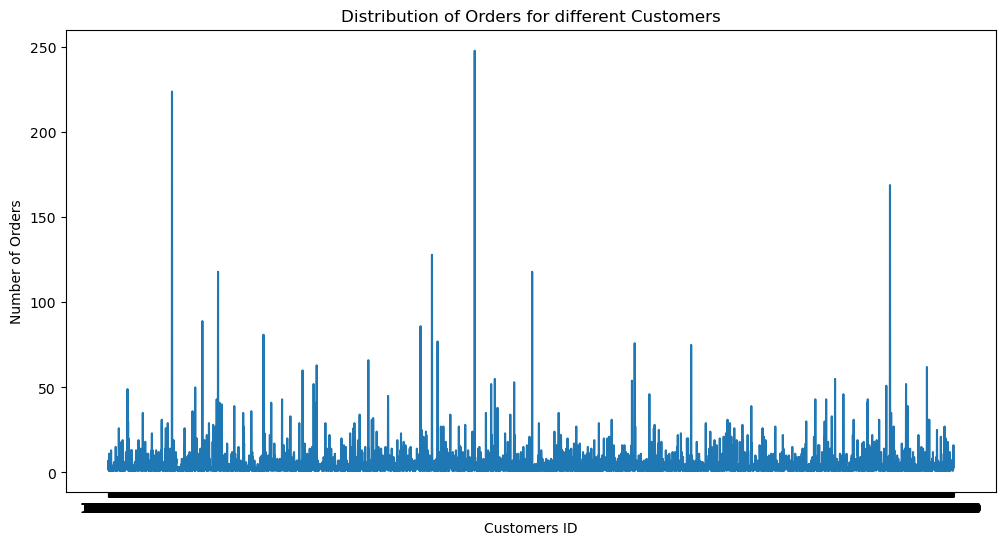

In [58]:
plt.subplots(figsize=(12,6))
plt.plot(customer_order_df['CustomerID'], customer_order_df['Order_Count'])
plt.xlabel('Customers ID')
plt.ylabel('Number of Orders')
plt.title('Distribution of Orders for different Customers')
plt.show()

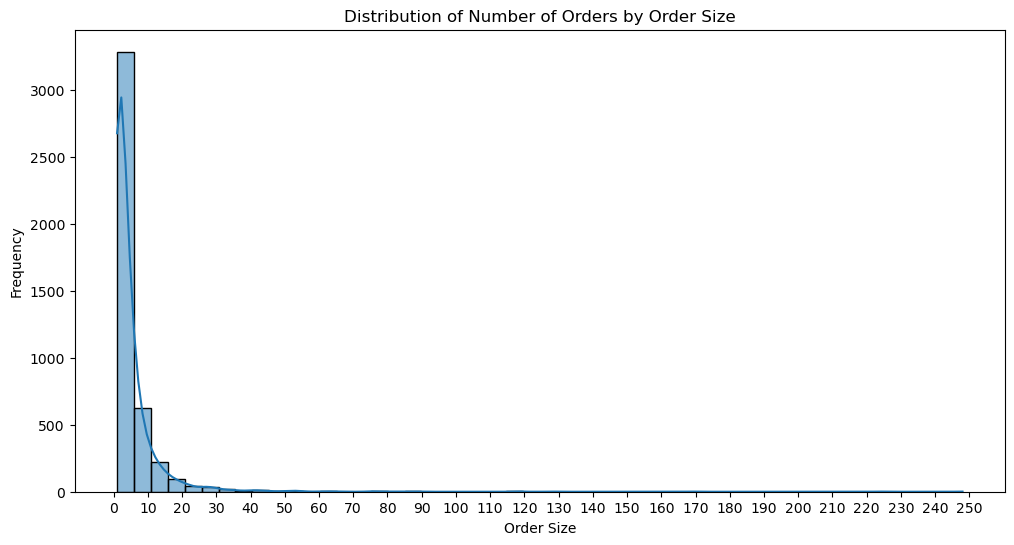

In [59]:
plt.figure(figsize=(12, 6))
sns.histplot(customer_order_df['Order_Count'], bins=50, kde=True)
plt.xticks(range(0, 260, 10))
plt.xlabel('Order Size')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Orders by Order Size')
plt.show()

####  Top 5 customers who have made the most purchases by order count

In [60]:
customer_order_df.sort_values(by="Order_Count",ascending=False).head(5)

,CustomerID,Order_Count
1895,14911.0,248
330,12748.0,224
4042,17841.0,169
1674,14606.0,128
568,13089.0,118


### 3. Product Analysis

#### Top 10 most frequently purchased products

In [61]:
product_df = online_retail_df['StockCode'].value_counts().reset_index()
product_df.columns = ["StockCode", "Frequency"]
top_10_most_purchased_products = product_df.sort_values(
    by="Frequency",
    ascending=True
).tail(n=10)

In [62]:
x = online_retail_df[['StockCode', 'Description']].drop_duplicates()
sk_names = [x[x['StockCode'] == skcd]['Description'].values[0] 
            for skcd in top_10_most_purchased_products['StockCode']]

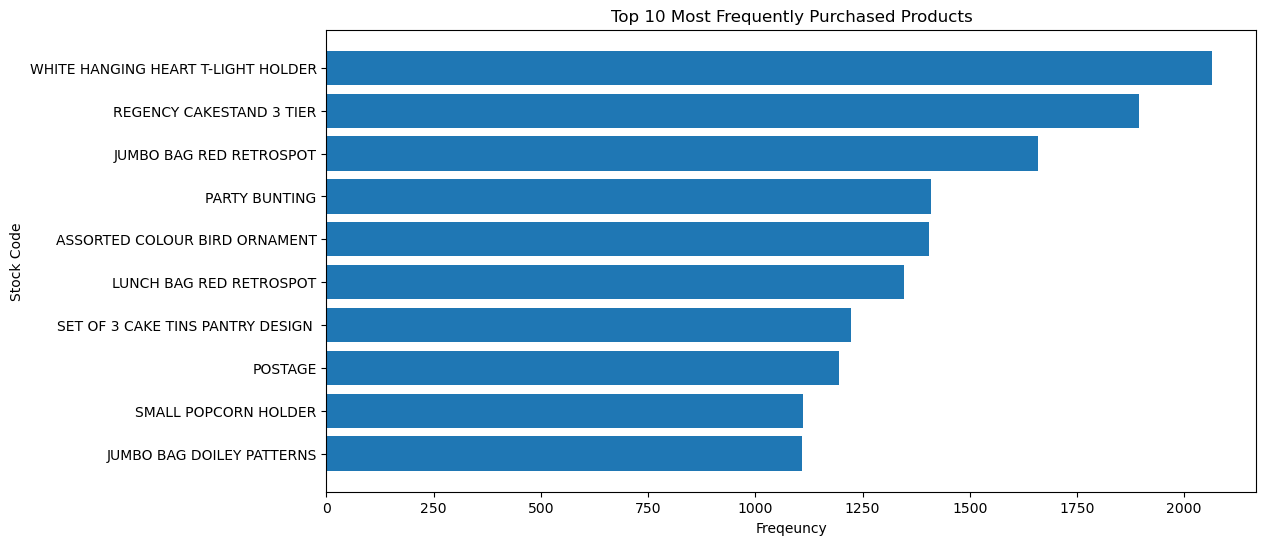

In [63]:
plt.figure(figsize=(12, 6))
plt.barh(
    sk_names, 
    top_10_most_purchased_products["Frequency"]) 
plt.xlabel("Freqeuncy")
plt.ylabel("Stock Code")
plt.title("Top 10 Most Frequently Purchased Products")
plt.show()

#### Average price of products in the dataset

In [64]:
average_price = online_retail_df["UnitPrice"].mean()

print(f"Average price of products in the dataset: {average_price:.2f}")

Average price of products in the dataset: 3.47


In [65]:
weighted_average_price = online_retail_df["Total_Amount"].sum() / online_retail_df["Quantity"].sum()

print(f"Weighted average price of products in the dataset: {weighted_average_price:.2f}")

Weighted average price of products in the dataset: 1.69


#### Product category that generates the highest revenue

In [66]:
product_category = online_retail_df.groupby('Description')['Total_Amount'].sum().sort_values(ascending=False)
product_category

Description
REGENCY CAKESTAND 3 TIER              132567.70
WHITE HANGING HEART T-LIGHT HOLDER     93767.80
JUMBO BAG RED RETROSPOT                83056.52
PARTY BUNTING                          67628.43
POSTAGE                                66710.24
                                        ...    
WHITE CHERRY LIGHTS                      -54.00
CHALKBOARD KITCHEN ORGANISER             -87.80
Discount                               -5696.22
CRUK Commission                        -7933.43
Manual                                -58745.46
Name: Total_Amount, Length: 3896, dtype: float64

In [67]:
top_10_product_categories = product_category.sort_values(ascending=True).tail(10)

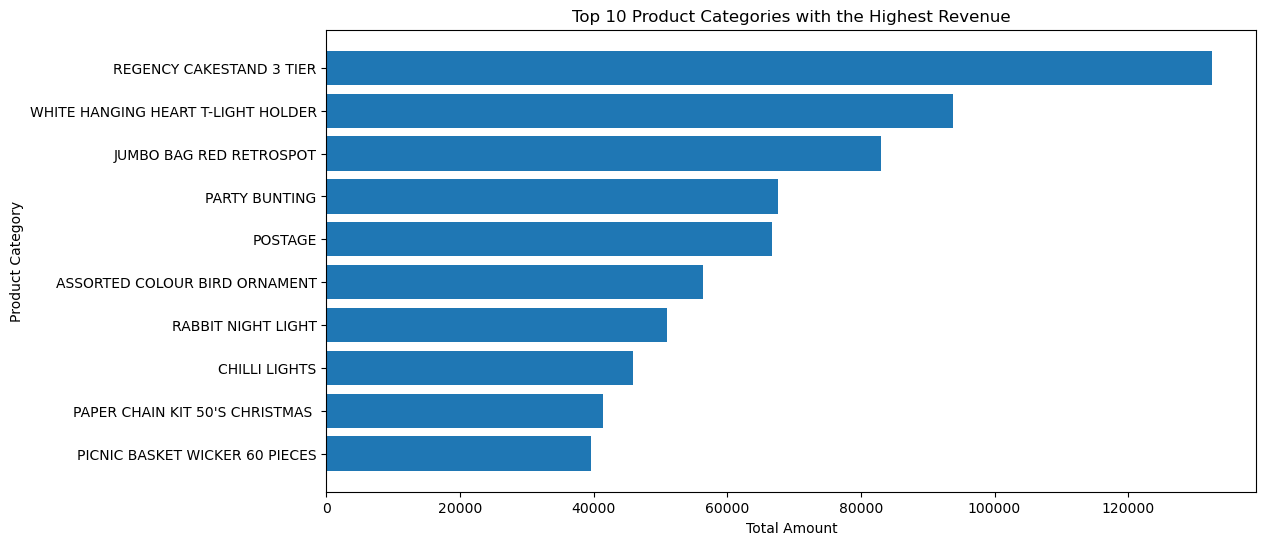

In [68]:
plt.figure(figsize=(12, 6))
plt.barh(top_10_product_categories.index, top_10_product_categories.values) 
plt.xlabel("Total Amount")
plt.ylabel("Product Category")
plt.title("Top 10 Product Categories with the Highest Revenue")
plt.show()

In [69]:
print(f"The product category that generates the highest revenue is {product_category.index[0]} with a total revenue of {product_category.values[0]}.")

The product category that generates the highest revenue is REGENCY CAKESTAND 3 TIER with a total revenue of 132567.69999999998.


### 4. Time Analysis

#### Day of the week when most orders are placed

In [70]:
orders_per_weekday = online_retail_df['Week Day'].value_counts().sort_values(ascending=False)
orders_per_weekday

Thursday     81575
Wednesday    69753
Tuesday      67376
Monday       65715
Sunday       61673
Friday       55512
Name: Week Day, dtype: int64

In [71]:
print(f"The day of the week when most orders are placed was {orders_per_weekday.index[0]} with a total of {orders_per_weekday.values[0]} orders placed.")

The day of the week when most orders are placed was Thursday with a total of 81575 orders placed.


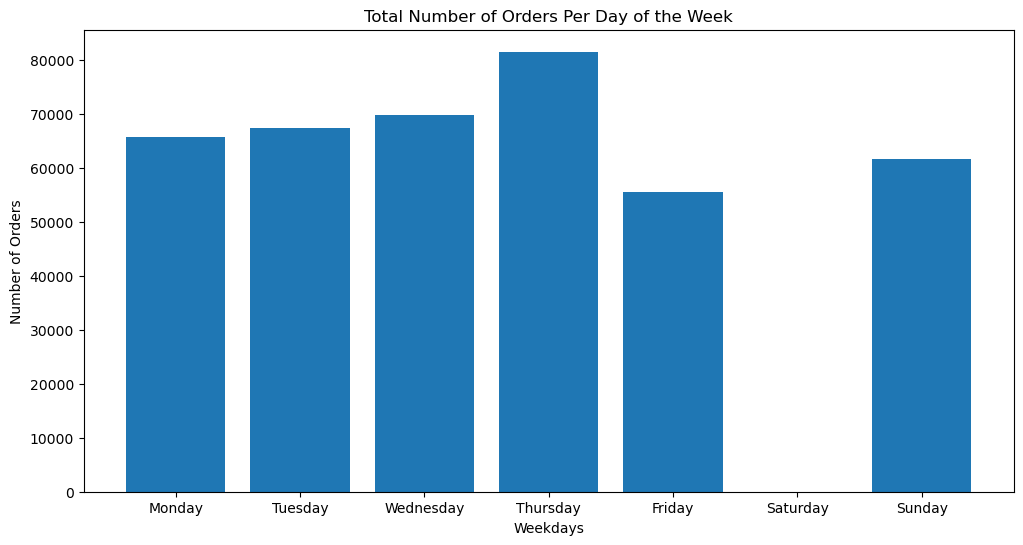

In [72]:
weekdays = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

orders_per_weekday = orders_per_weekday.reindex(weekdays)
plt.figure(figsize=(12, 6))
plt.bar(orders_per_weekday.index, orders_per_weekday.values) 
plt.xlabel("Weekdays")
plt.ylabel("Number of Orders")
plt.title("Total Number of Orders Per Day of the Week")
plt.show()

#### Time of the day when most orders are placed

In [73]:
orders_per_hour = online_retail_df['Order Hour'].value_counts().sort_values(ascending=False)
orders_per_hour

12    72213
13    64051
14    54194
11    49525
15    45641
10    38725
16    24618
9     22446
17    13604
8      8789
19     3423
18     3104
20      847
7       383
6        41
Name: Order Hour, dtype: int64

In [74]:
print(f"The time of the day when most orders are placed is at {orders_per_hour.index[0]}:00 with a total of {orders_per_hour.values[0]} orders placed.")

The time of the day when most orders are placed is at 12:00 with a total of 72213 orders placed.


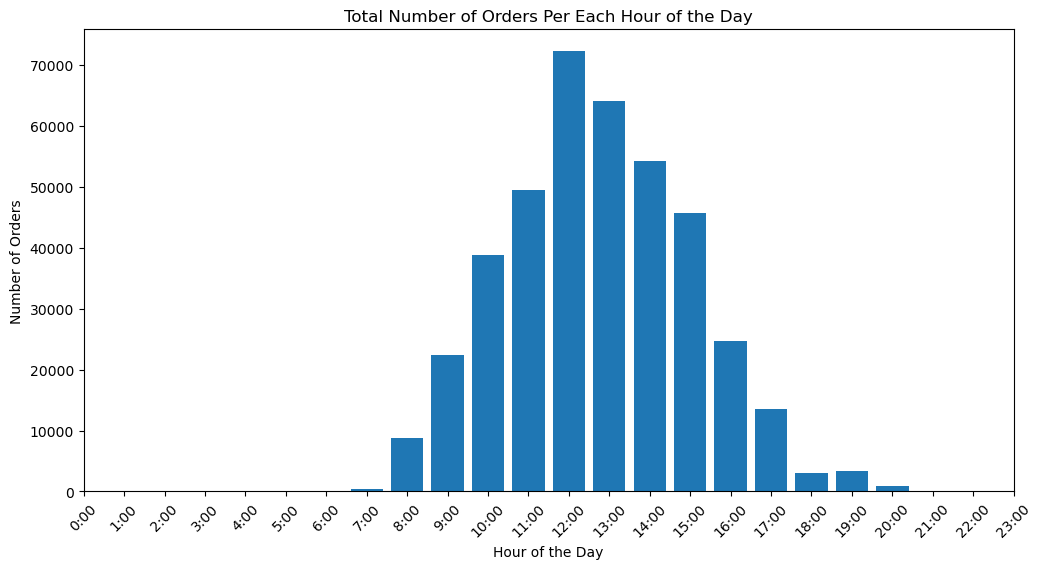

In [75]:
orders_per_hour = online_retail_df['Order Hour'].value_counts().sort_values(ascending=True)
hours = range(0, 24)

plt.figure(figsize=(12, 6))
plt.bar(orders_per_hour.index, orders_per_hour.values)
plt.xticks(hours, [f"{hour}:00" for hour in hours], rotation=45)  
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Orders")
plt.title("Total Number of Orders Per Each Hour of the Day")
plt.show()

#### Average order processing time

This analysis cannot be performed due to insufficient information within the dataset. The average order processing time involves calculating the time difference between the order placement (`InvoiceDate`) and its completion or delivery, which, in this dataset, is unavailable.

#### Seasonal trends in the dataset

In [76]:
orders_per_month = online_retail_df['Invoice Month'].value_counts().sort_index(ascending=True)
orders_per_month

1     21670
2     20138
3     27516
4     22988
5     28661
6     27576
7     27256
8     27444
9     40459
10    49928
11    64232
12    43736
Name: Invoice Month, dtype: int64

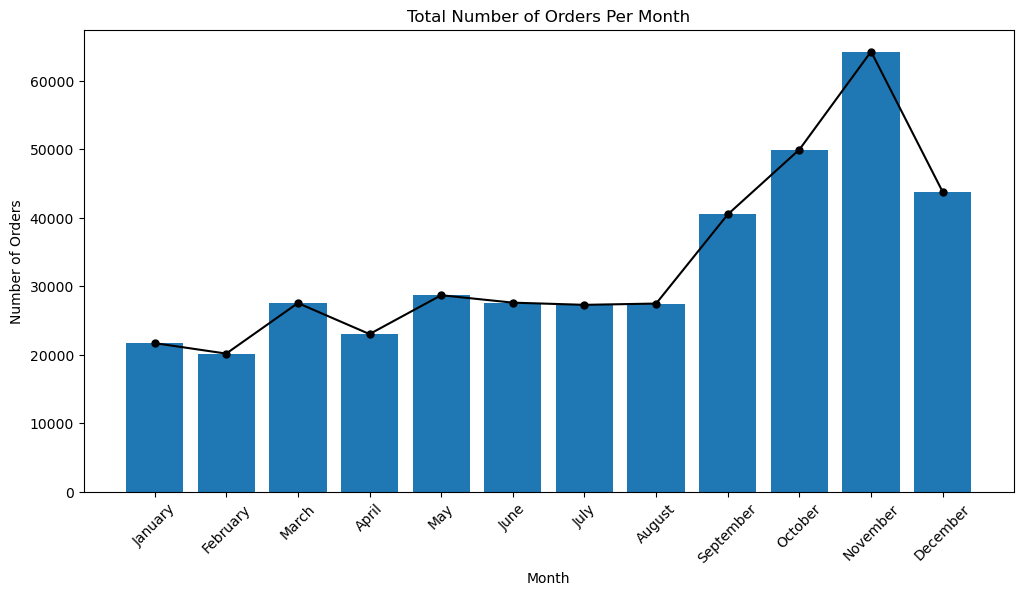

In [77]:
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
plt.figure(figsize=(12, 6))
plt.bar(orders_per_month.index, orders_per_month.values)
orders_per_month.plot(kind='line', marker='.', color='black', ms=10)
plt.xticks(range(1, 13), months, rotation=45)
plt.xlabel("Month")
plt.ylabel("Number of Orders")
plt.title("Total Number of Orders Per Month")
plt.show()

In [78]:
orders_per_month = orders_per_month.sort_values(ascending=False)
print(f"The highest number of orders were placed during the month of {months[orders_per_month.index[0] - 1]} with a total of {orders_per_month.values[0]} orders placed.")

The highest number of orders were placed during the month of November with a total of 64232 orders placed.


### 5. Geographical Analysis

<b>Top 5 countries with Highest orders</b>

In [79]:
geo=online_retail_df.groupby('Country')['InvoiceNo'].nunique().reset_index(name='Frequency').sort_values(by=['Frequency'], ascending=False)
geo.head(5)

,Country,Frequency
35,United Kingdom,19857
14,Germany,603
13,France,458
10,EIRE,319
3,Belgium,119


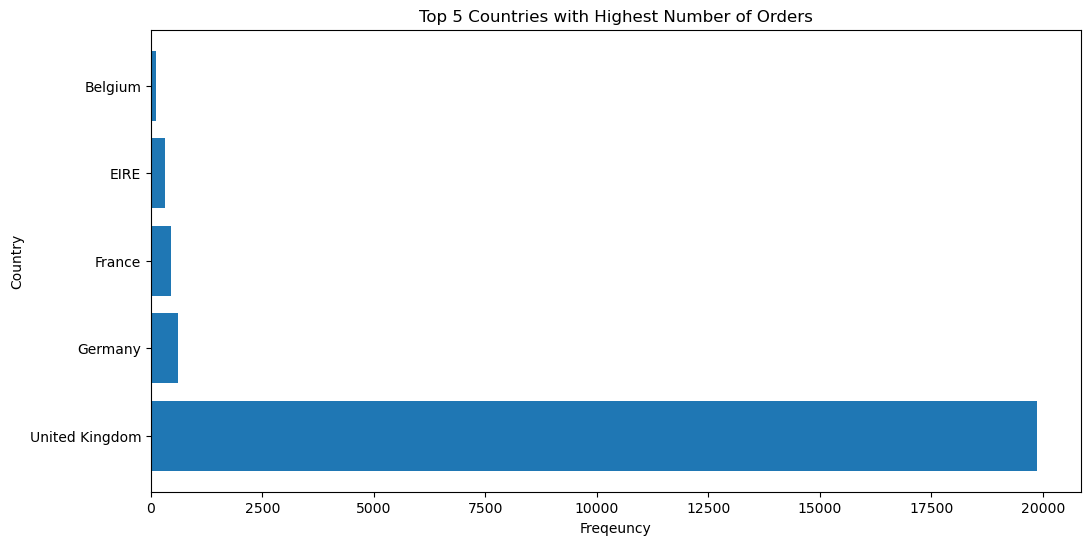

In [80]:
plt.figure(figsize=(12, 6))
plt.barh(geo.head(5)["Country"], geo.head(5)["Frequency"]) 
plt.xlabel("Freqeuncy")
plt.ylabel("Country")
plt.title("Top 5 Countries with Highest Number of Orders")
plt.show()

<b>Correlation Analysis</b>

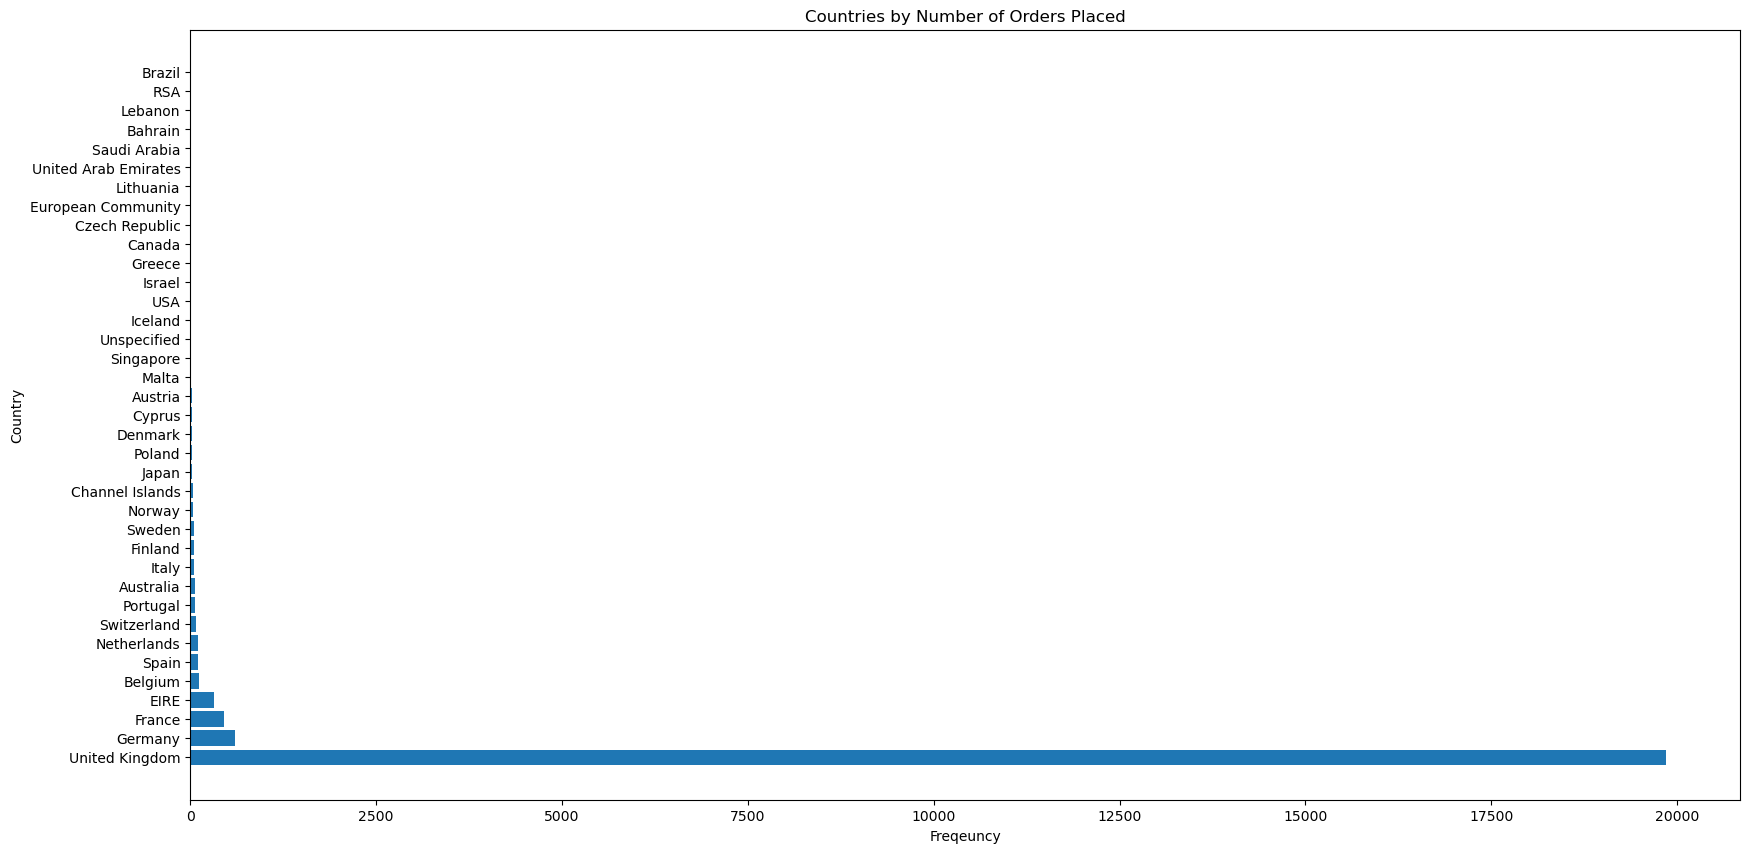

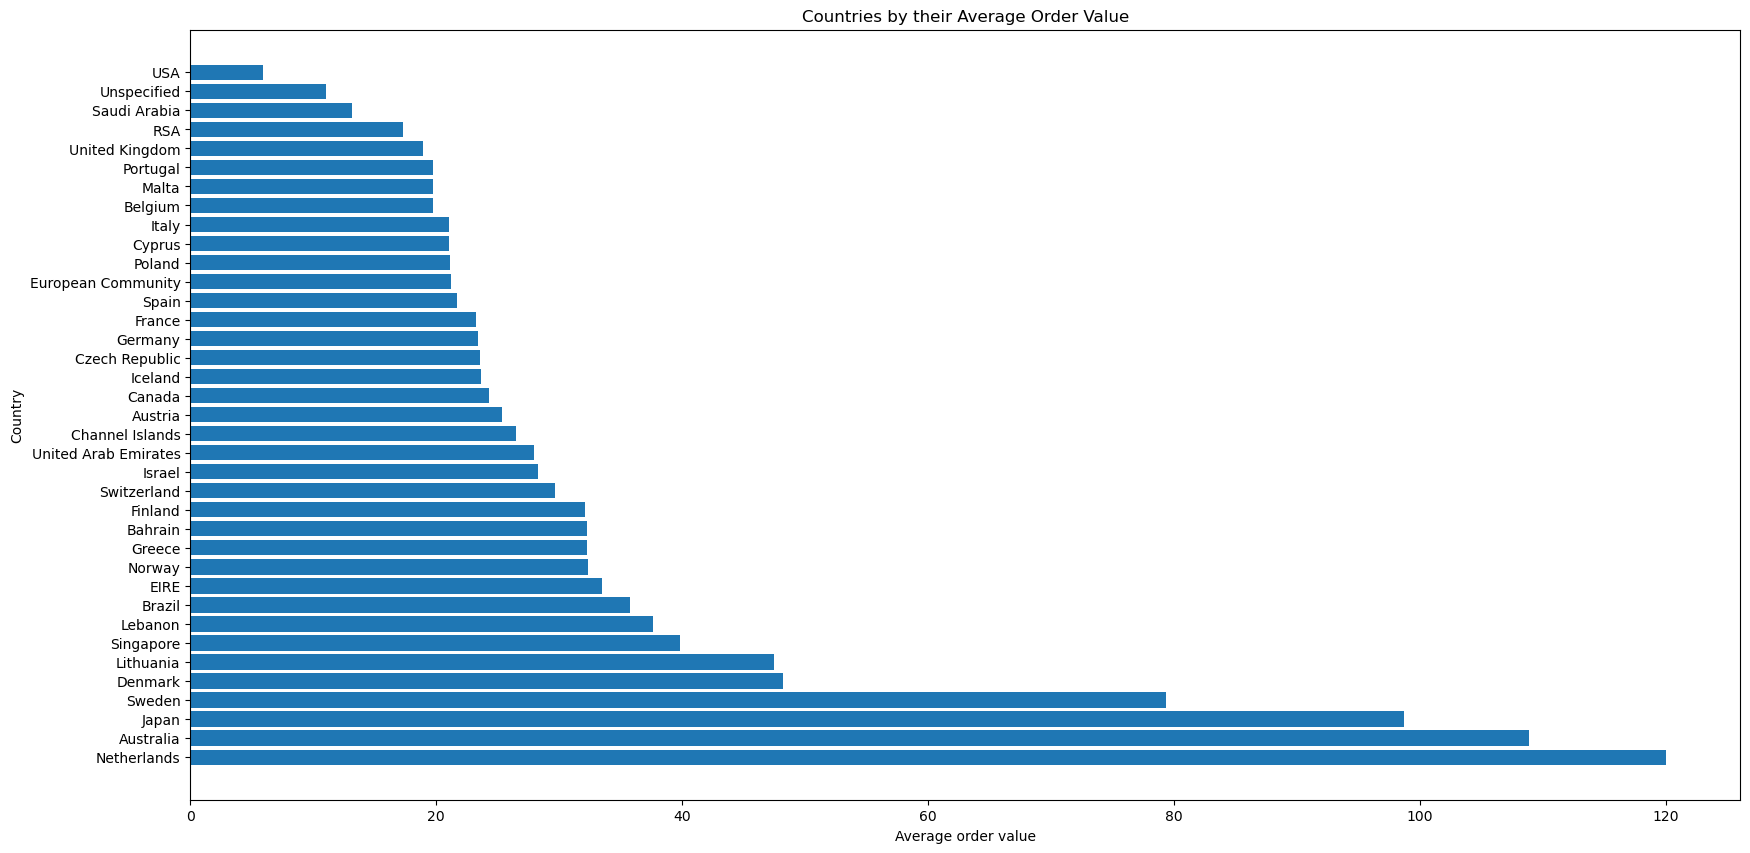

In [81]:
val=online_retail_df.groupby('Country')['Total_Amount'].mean().reset_index(name='Average_order_val').sort_values(by=['Average_order_val'], ascending=False)
plt.figure(figsize=(20, 10))
plt.barh(geo["Country"], geo["Frequency"]) 
plt.xlabel("Freqeuncy")
plt.ylabel("Country")
plt.title("Countries by Number of Orders Placed")
plt.show()

plt.figure(figsize=(20, 10))
plt.barh(val["Country"], val["Average_order_val"]) 
plt.xlabel("Average order value")
plt.ylabel("Country")
plt.title("Countries by their Average Order Value")
plt.show()

The first bar plot, illustrating the frequency of customers by country, indicates that the majority of customers are from the United Kingdom. However, in the second plot, showcasing the average order value per country, it's noticeable that customers from countries like the Netherlands, Australia, Japan, and Sweden tend to place orders of higher average values.<br>

This contrast suggests an interesting observation: although the United Kingdom has a larger number of customers, their individual orders tend to be smaller in value compared to customers from the aforementioned countries. The inference drawn from the second plot suggests that customers from the Netherlands, Australia, Japan, and Sweden potentially place fewer orders but of substantially higher values.<br>

This discrepancy might be due to various factors. Customers from countries with higher average order values might be making infrequent but significant purchases, possibly buying higher-priced items or larger quantities in a single order compared to customers from the United Kingdom who may make more frequent but smaller purchases.<br>

In [82]:
x = online_retail_df.groupby('Country')['Total_Amount'].mean().reset_index(name='Average_Order_Value').sort_values(by=['Average_Order_Value'], ascending=False)
y = online_retail_df.groupby('Country').size().reset_index(name='Order_Frequency')

In [83]:
z = pd.merge(left=x, right=y, on='Country')

In [84]:
z.head()

,Country,Average_Order_Value,Order_Frequency
0,Netherlands,120.059696,2371
1,Australia,108.910787,1258
2,Japan,98.716816,358
3,Sweden,79.360976,461
4,Denmark,48.247147,389


<Axes: xlabel='Average_Order_Value', ylabel='Order_Frequency'>

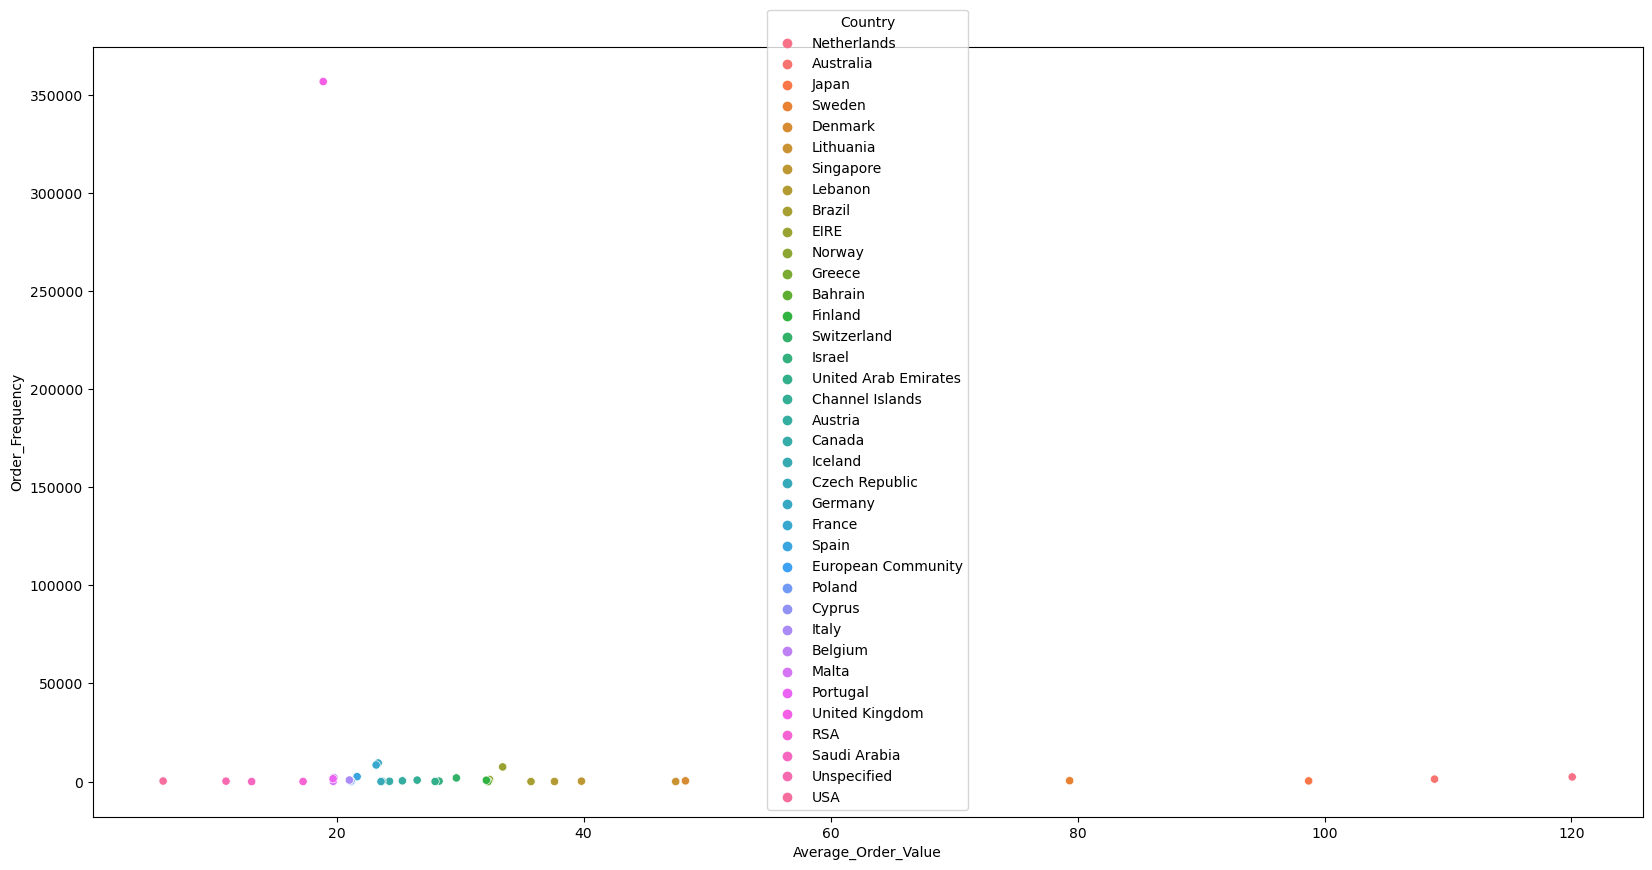

In [85]:
plt.figure(figsize=(20, 10))
sns.scatterplot(data=z, x='Average_Order_Value', y='Order_Frequency', hue='Country')

### 6. Payment Analysis
The dataset does not contain any payment-related data, making it not suitable for payment analysis. Hence, we cannot ascertain the most common payment methods used by customers and derive a relationship between payment method and the order amount.

### 7. Customer Behavior

In [86]:
# Convert 'InvoiceDate' to datetime format
online_retail_df['InvoiceDate'] = pd.to_datetime(online_retail_df['InvoiceDate'], format='%d-%m-%Y %H:%M')

# Calculate the average time between first and last purchase
online_retail_df['FirstPurchaseDate'] = online_retail_df.groupby('CustomerID')['InvoiceDate'].transform('min')
online_retail_df['LastPurchaseDate'] = online_retail_df.groupby('CustomerID')['InvoiceDate'].transform('max')
average_duration = (online_retail_df['LastPurchaseDate'] - online_retail_df['FirstPurchaseDate']).mean()

online_retail_df['Recency'] = (pd.to_datetime('today') - online_retail_df['LastPurchaseDate']).dt.days
online_retail_df['Segment'] = pd.qcut(online_retail_df['Recency'], q=4, labels=['Inactive', 'Cold', 'Warm', 'Active'])


print(f"7a. Average duration between first and last purchase: {average_duration.days} days")
print("7b. Customer segments based on purchase behavior:")
online_retail_df[['CustomerID', 'Segment']]

7a. Average duration between first and last purchase: 243 days
7b. Customer segments based on purchase behavior:


,CustomerID,Segment
0,17850.0,Active
1,17850.0,Active
2,17850.0,Active
3,17850.0,Active
4,17850.0,Active
...,...,...
541904,12680.0,Inactive
541905,12680.0,Inactive
541906,12680.0,Inactive
541907,12680.0,Inactive


### 8. Returns and Refunds

In [87]:
# Percentage of orders with returns or refunds
return_percentage = (cancelled_transactions.shape[0] / online_retail_df.shape[0]) * 100
print(f"Percentage of orders with returns or refunds: {return_percentage}%\n")

Percentage of orders with returns or refunds: 2.209141343213713%



<b>Correlation between product category & likelihood of return</b>

In [88]:
returns = cancelled_transactions.groupby('Description').size().reset_index(name='n_returns')

In [89]:
orders = online_retail_df.groupby('Description').size().reset_index(name='n_orders')

In [90]:
x = pd.merge(left=orders, right=returns, on='Description')

In [91]:
x['return_likelihood'] = (x['n_returns'] / x['n_orders'])*100

In [92]:
x.sort_values(by=['return_likelihood', 'Description'], ascending=True)

,Description,n_orders,n_returns,return_likelihood
1143,PACK OF 72 SKULL CAKE CASES,506,1,0.197628
1659,SPACEBOY BIRTHDAY CARD,396,1,0.252525
1574,SET/20 RED RETROSPOT PAPER NAPKINS,748,2,0.267380
48,4 TRADITIONAL SPINNING TOPS,372,1,0.268817
1634,SMALL DOLLY MIX DESIGN ORANGE BOWL,369,1,0.271003
...,...,...,...,...
1707,SWEETHEART KEY CABINET,1,1,100.000000
1723,TEA TIME CAKE STAND IN GIFT BOX,1,1,100.000000
1806,VINTAGE GOLD TINSEL REEL,1,1,100.000000
1855,WHITE CHERRY LIGHTS,1,1,100.000000


It is hard to find exact correlation between products and their return likelihood. Hence no correlation

### 9. Profitability Analysis

`Profit = Revenue - Cost` 
<br>Profit is calculated by substracting cost of acquiring products from total revenue generated. However, <b>the dataset has no information on procurement cost, labour cost, \& maintenance cost etc</b>. Hence <b>we cannot answer the profitability related questions</b>. Instead we try to show the products that generate high revenue for the company.

In [93]:
x = online_retail_df.groupby('Description')['Total_Amount'].sum().reset_index(name='Total Revenue Generated')
x.sort_values('Total Revenue Generated', ascending=False).head(5)

,Description,Total Revenue Generated
2780,REGENCY CAKESTAND 3 TIER,132567.70
3716,WHITE HANGING HEART T-LIGHT HOLDER,93767.80
1771,JUMBO BAG RED RETROSPOT,83056.52
2355,PARTY BUNTING,67628.43
2624,POSTAGE,66710.24


### 10. Customer Satisfaction

There is no data available on customer feedback or ratings for products or services, hence we cannot do any sentiment analysis to find out the customer satisfaction. Instead we try to observe the return likelihood of each product and make a statement about the satisfaction of the customers.

In [94]:
returns = cancelled_transactions.groupby('Description').size().reset_index(name='n_returns')
orders = online_retail_df.groupby('Description').size().reset_index(name='n_orders')
x = pd.merge(left=orders, right=returns, on='Description')
x['return_likelihood'] = (x['n_returns'] / x['n_orders'])*100
x = x.sort_values(by=['return_likelihood', 'Description'], ascending=True)

In [95]:
y = x[['Description', 'return_likelihood']]

<b>Top 10 products with low return likelihood</b>

In [96]:
y.head(n=10)

,Description,return_likelihood
1143,PACK OF 72 SKULL CAKE CASES,0.197628
1659,SPACEBOY BIRTHDAY CARD,0.252525
1574,SET/20 RED RETROSPOT PAPER NAPKINS,0.267380
48,4 TRADITIONAL SPINNING TOPS,0.268817
1634,SMALL DOLLY MIX DESIGN ORANGE BOWL,0.271003
148,BEWARE OF THE CAT METAL SIGN,0.273224
1553,SET OF 6 SOLDIER SKITTLES,0.290698
1103,OPEN CLOSED METAL SIGN,0.291545
1619,SINGLE HEART ZINC T-LIGHT HOLDER,0.295858
1743,TRADITIONAL MODELLING CLAY,0.296736


<b>Top 10 products with high return likelihood</b>

In [97]:
y.tail(10)

,Description,return_likelihood
947,LARGE ROUND CUTGLASS CANDLESTICK,100.0
1240,PINK LARGE JEWELED PHOTOFRAME,100.0
1252,PINK POODLE HANGING DECORATION,100.0
1285,PORCELAIN HANGING BELL SMALL,100.0
1650,SMALL TAHITI BEACH BAG,100.0
1707,SWEETHEART KEY CABINET,100.0
1723,TEA TIME CAKE STAND IN GIFT BOX,100.0
1806,VINTAGE GOLD TINSEL REEL,100.0
1855,WHITE CHERRY LIGHTS,100.0
1909,WOOLLY HAT SOCK GLOVE ADVENT STRING,100.0


The return likelihood can act as a proxy to customer satisfaction. If the customer likes a product then it is not likely the customer will return it, similarly if customers does not like a product they will most probabiliy return it. Thus, from above we can say <br><b> The products with low customer satisfaction are: </b>
- `LARGE ROUND CUTGLASS CANDLESTICK`, 
- `PINK LARGE JEWELED PHOTOFRAME`, 
- `PINK POODLE HANGING DECORATION`, 
- `PORCELAIN HANGING BELL SMALL`, 
- `SMALL TAHITI BEACH BAG` etc 

<b>The products with high customer satisfaction are:</b>

- `PACK OF 72 SKULL CAKE CASES`
- `SPACEBOY BIRTHDAY CARD`
- `SET/20 RED RETROSPOT PAPER NAPKINS`
- `4 TRADITIONAL SPINNING TOPS`
- `SMALL DOLLY MIX DESIGN ORANGE BOWL`